# 3. Propiedades estad√≠sticas del lenguaje natural

## Objetivo

- Explorar propiedades estad√≠sticas del lenguaje natural
- Observar si se cumplen propiedades como:
    - La distribuci√≥n de Zipf
    - La distribuci√≥n de Heap
- Observar como impacta la normalizaci√≥n

## Perspectivas formales

- Fueron el primer acercamiento al procesamiento del lenguaje natural. Sin embargo tienen varias **desventajas**
- Requieren **conocimiento previo de la lengua**
- Las herramientas son especificas de la lengua
- Los fenomenos que se presentan son muy amplios y dificilmente se pueden abarcar con reglas formales (muchos casos especiales)
- Las reglas tienden a ser rigidas y no admiten incertidumbre en el resultado

## Perspectiva estad√≠stica

- Puede integrar aspectos de la perspectiva formal
- Lidia mejor con la incertidumbre y es menos rigida que la perspectiva formal
- No requiere conocimiento profundo de la lengua. Se pueden obtener soluciones de forma no supervisada

### Modelos estad√≠sticos

- Las **frecuencias** juegan un papel fundamental para hacer una descripci√≥n acertada del lenguaje
- Las frecuencias nos dan informaci√≥n de la **distribuci√≥n de tokens**, de la cual podemos estimar probabilidades.
- Existen **leyes emp√≠ricas del lenguaje** que nos indican como se comportan las lenguas a niveles estad√≠sticos
- A partir de estas leyes y otras reglas estad√≠sticas podemos crear **modelos del lenguaje**; es decir, asignar probabilidades a las unidades ling√º√≠sticas

In [9]:
# Bibliotecas
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 4]
from re import sub
import numpy as np
import pandas as pd
from itertools import chain

In [2]:
mini_corpus = """Humanismo es un concepto polis√©mico que se aplica tanto al estudio de las letras humanas, los
estudios cl√°sicos y la filolog√≠a grecorromana como a una gen√©rica doctrina o actitud vital que
concibe de forma integrada los valores humanos. Por otro lado, tambi√©n se denomina humanis-
mo al ¬´sistema de creencias centrado en el principio de que las necesidades de la sensibilidad
y de la inteligencia humana pueden satisfacerse sin tener que aceptar la existencia de Dios
y la predicaci√≥n de las religiones¬ª, lo que se aproxima al laicismo o a posturas secularistas.
Se aplica como denominaci√≥n a distintas corrientes filos√≥ficas, aunque de forma particular,
al humanismo renacentista1 (la corriente cultural europea desarrollada de forma paralela al
Renacimiento a partir de sus or√≠genes en la Italia del siglo XV), caracterizado a la vez por su
vocaci√≥n filol√≥gica cl√°sica y por su antropocentrismo frente al teocentrismo medieval
"""
words = mini_corpus.replace("\n", " ").split(" ")
len(words)

146

In [4]:
words[:10]

['Humanismo',
 'es',
 'un',
 'concepto',
 'polis√©mico',
 'que',
 'se',
 'aplica',
 'tanto',
 'al']

In [5]:
vocabulary = Counter(words)
vocabulary.most_common(10)

[('de', 11),
 ('la', 7),
 ('al', 6),
 ('que', 5),
 ('a', 5),
 ('y', 4),
 ('se', 3),
 ('las', 3),
 ('forma', 3),
 ('aplica', 2)]

In [6]:
len(vocabulary)

101

In [7]:
def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words", log_scale=False):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    plt.title(title)

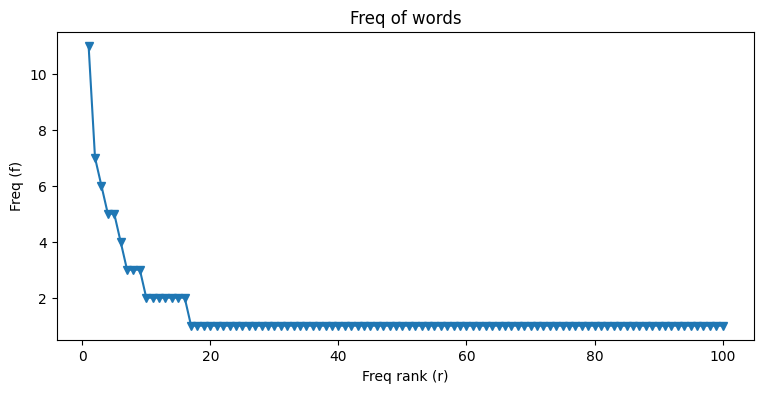

In [10]:
frequencies = get_frequencies(vocabulary, 100)
plot_frequencies(frequencies)

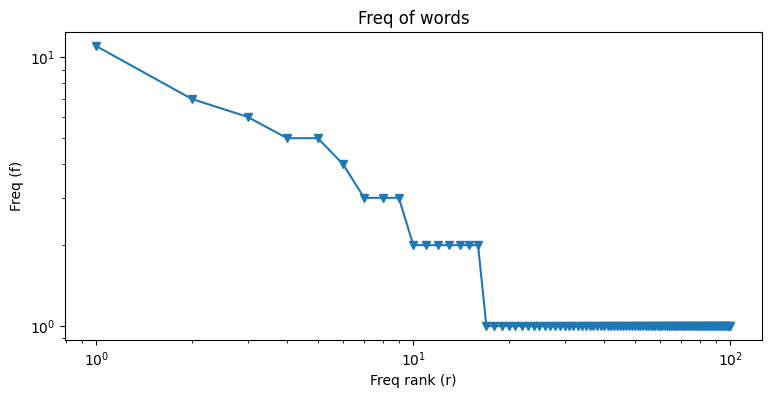

In [11]:
plot_frequencies(frequencies, log_scale=True)

### ¬øQu√© pasar√° con m√°s datos? üìä

## Ley Zipf

Exploraremos el Corpus de Referencia del Espa√±ol Actual [CREA](https://www.rae.es/banco-de-datos/crea/crea-escrito)

<center><img src="img/crea.png"></center>

In [12]:
!head corpora/zipf/crea_full.csv

words	freq
de	9999518
la	6277560
que 	4681839
el	4569652
en	4234281
y	4180279
a	3260939
los	2618657
se	2022514


In [13]:
corpus_freqs = pd.read_csv('corpora/zipf/crea_full.csv', delimiter='\t', encoding="latin-1")
#N = len(set(chain(*[list(str(w)) for w in corpus_freqs['words'].to_list()])))
corpus_freqs.head(10)

words     freq
0    de  9999518
1    la  6277560
2  que   4681839
3    el  4569652
4    en  4234281
5     y  4180279
6     a  3260939
7   los  2618657
8    se  2022514
9   del  1857225

In [18]:
corpus_freqs.iloc[10]

words        las
freq     1686741
Name: 10, dtype: object

In [19]:
corpus_freqs[corpus_freqs["words"] == "barriga"]

words  freq
12615  barriga   872

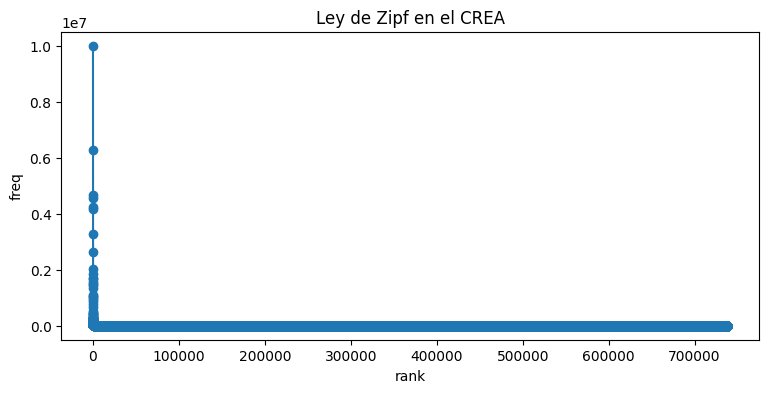

In [20]:
corpus_freqs["freq"].plot(marker="o")
plt.title('Ley de Zipf en el CREA')
plt.xlabel('rank')
plt.ylabel('freq')
plt.show()

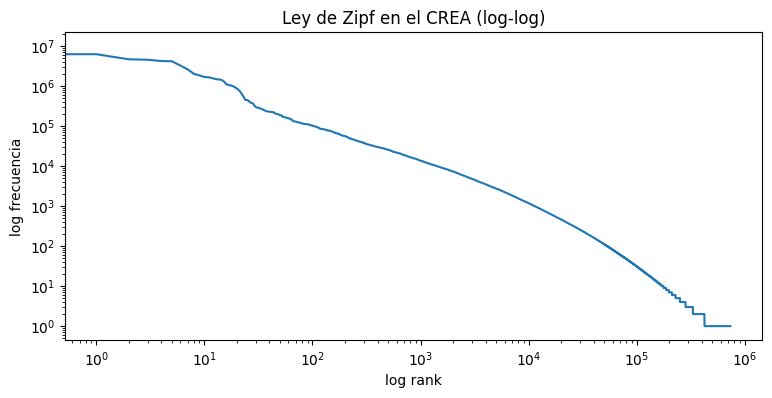

In [21]:
corpus_freqs['freq'].plot(loglog=True, legend=False)
plt.title('Ley de Zipf en el CREA (log-log)')
plt.xlabel('log rank')
plt.ylabel('log frecuencia')
plt.show()

### Ley de Zipf

- Notamos que las frecuencias entre lenguas siguen un patr√≥n
- Pocas palabras (tipos) son muy frecuentes, mientras que la mayor√≠a de palabras ocurren pocas veces

De hecho, la frecuencia de la palabra que ocupa la posici√≥n r en el rank, es proporcional a $\frac{1}{r}$ (La palabra m√°s frecuente ocurrir√° aproximadamente el doble de veces que la segunda palabra m√°s frecuente en el corpus y tres veces m√°s que la tercer palabra m√°s frecuente del corpus, etc)

$$f(w_r) \propto \frac{1}{r^Œ±}$$

Donde:
- $r$ es el rank que ocupa la palabra en el corpus
- $f(w_r)$ es la frecuencia de la palabra en el corpus
- $\alpha$ es un par√°metro, el valor depender√° del corpus o fen√≥meno que estemos observando

### Formulaci√≥n de la Ley de Zipf:

$f(w_{r})=\frac{c}{r^{\alpha }}$

En la escala logar√≠timica:

$log(f(w_{r}))=log(\frac{c}{r^{\alpha }})$

$log(f(w_{r}))=log (c)-\alpha log (r)$

### ‚ùì ¬øC√≥mo estimar el par√°metro $\alpha$?

In [23]:
# Ver c√°pitulo 12. Distribuci√≥n de Zipf de Victor Mijangos
from scipy.optimize import minimize

def calculate_alpha(ranks: np.array, frecs: np.array) -> float:
    # Inicializaci√≥n
    a0 = 1
    # Funci√≥n de minimizaci√≥n:
    func = lambda a: sum((np.log(frecs)-(np.log(frecs[0])-a*np.log(ranks)))**2)
    # Minimizaci√≥n: Usando minimize de scipy.optimize:
    return minimize(func, a0).x[0] 

ranks = np.array(corpus_freqs.index) + 1
frecs = np.array(corpus_freqs['freq'])

a_hat = calculate_alpha(ranks, frecs)

print('alpha:', a_hat)

alpha: 1.1812227900048202


In [24]:
def plot_generate_zipf(alpha: np.float64, ranks: np.array, freqs: np.array) -> None:
    plt.plot(np.log(ranks), -a_hat*np.log(ranks) + np.log(frecs[0]), color='r', label='Aproximaci√≥n Zipf')

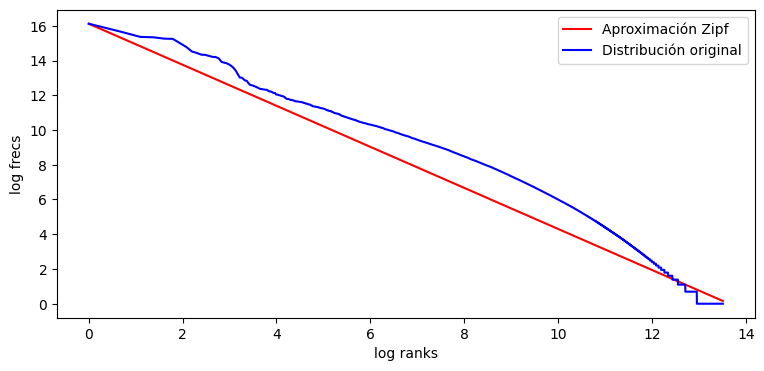

In [25]:
plot_generate_zipf(a_hat, ranks, frecs)
plt.plot(np.log(ranks), np.log(frecs), color='b', label='Distribuci√≥n original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Ley de Heap

Relaci√≥n entre el n√∫mero de **tokens** y **tipos** de un corpus

$$T \propto N^b$$

D√≥nde:

- $T = $ n√∫mero de tipos
- $N = $ n√∫mero de tokens
- $b = $ par√°metro  

- **TOKENS**: N√∫mero total de palabras dentro del texto (incluidas repeticiones)
- **TIPOS**: N√∫mero total de palabras √∫nicas en el texto

In [27]:
# Obtenemos los tipos y tokens
total_tokens = corpus_freqs["freq"].sum()
total_types = len(corpus_freqs)

In [28]:
total_tokens, total_types

(152558294, 737799)

In [29]:
# Ordenamos el corpus por frecuencia
corpus_freqs_sorted = corpus_freqs.sort_values(by='freq', ascending=False)

# Calculamos la frecuencia acumulada
corpus_freqs_sorted['cum_tokens'] = corpus_freqs_sorted['freq'].cumsum()

# Calculamos el n√∫mero acumulado de tipos
corpus_freqs_sorted['cum_types'] = range(1, total_types + 1)

In [30]:
corpus_freqs_sorted.head()

words     freq  cum_tokens  cum_types
0    de  9999518     9999518          1
1    la  6277560    16277078          2
2  que   4681839    20958917          3
3    el  4569652    25528569          4
4    en  4234281    29762850          5

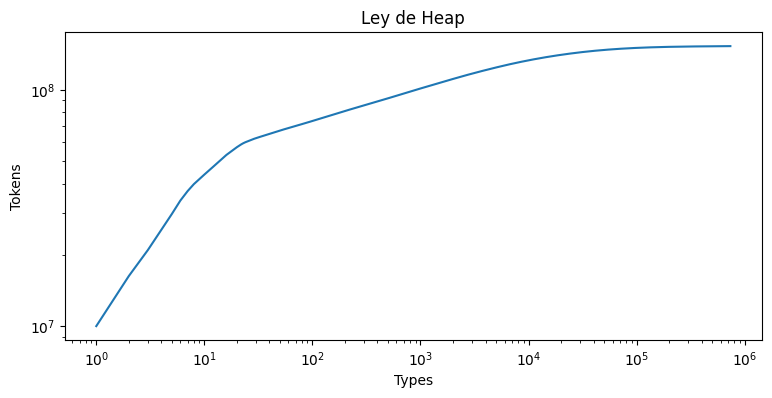

In [31]:
# Plot de la ley de Heap
plt.plot(corpus_freqs_sorted['cum_types'], corpus_freqs_sorted['cum_tokens'])
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Types')
plt.ylabel('Tokens')
plt.title('Ley de Heap')
plt.show()

## ¬øOtros idiomas? üáßüá¥ üá®üá¶ üá≤üáΩ

### Presentando `pyelotl` üåΩ

In [ ]:
!pip install elotl

- [Documentaci√≥n](https://pypi.org/project/elotl/)
- Paquete para desarrollo de herramientas de NLP enfocado en lenguas de bajos recursos digitales habladas en M√©xico

In [32]:
from elotl import corpus as elotl_corpus


print("Name\t\tDescription")
for row in elotl_corpus.list_of_corpus():
    print(row)

Name		Description
['axolotl', 'Is a nahuatl corpus']
['tsunkua', 'Is an otom√≠ corpus']


Cada corpus se pueden visualizar y navegar a trav√©s de interfaz web.
- [Axolotl](https://axolotl-corpus.mx/)
- [Tsunkua](https://tsunkua.elotl.mx/)

In [33]:
axolotl = elotl_corpus.load("axolotl")
for row in axolotl:
    print("Lang 1 (es) =", row[0])
    print("Lang 2 (nah) =", row[1])
    print("Variante =", row[2])
    print("Documento de origen =", row[3])
    break

Lang 1 (es) = Vino a iluminar el sol y all√≠ fue a ver a su
Lang 2 (nah) = tlaminako tonati uan noponi kiitato
Variante = 
Documento de origen = Lo que relatan de antes (cuentos t√©nek y nahuas de la huasteca)


In [34]:
tsunkua = elotl_corpus.load("tsunkua")
for row in tsunkua:
    print("Lang 1 (es) =", row[0])
    print("Lang 2 (oto) =", row[1])
    print("Variante =", row[2])
    print("Documento de origen =", row[3])
    break

Lang 1 (es) = Arde, se calcina su coraz√≥n y su cuerpo est√° doliente. De igual modo a m√≠ me arde y se calcina mi coraz√≥n.
Lang 2 (oto) = ZoÃ±, da zot'i ri nd√§te ne ri ngoÃ±k'ei yabuÃ± xa √±'uÃ±. MahyeÃ±gi nugi zoÃ± ne da z√§t'i ma nd√§te.
Variante = Otom√≠ del Mezquital (ote)
Documento de origen = Visi√≥n de los vencidos (h√±ah√±u)


In [35]:
def extract_words_from_sentence(sentence: str) -> list:
    return sub(r'[^\w\s\']', ' ', sentence).lower().split()

def get_words(corpus: list) -> tuple[list, list]:
    words_l1 = []
    words_l2 = []
    for row in corpus:
        words_l1.extend(extract_words_from_sentence(row[0]))
        words_l2.extend(extract_words_from_sentence(row[1]))
    return words_l1, words_l2

In [36]:
spanish_words_na, nahuatl_words = get_words(axolotl)
spanish_words_oto, otomi_words = get_words(tsunkua)

In [37]:
spanish_words_na[:10]

['vino', 'a', 'iluminar', 'el', 'sol', 'y', 'all√≠', 'fue', 'a', 'ver']

In [38]:
nahuatl_words[:10]

['tlaminako',
 'tonati',
 'uan',
 'noponi',
 'kiitato',
 'auh',
 'in',
 'ye',
 'yuhqui',
 'in']

### Tokens

In [39]:
print("N√∫mero total de palabras en n√°huatl (corpus 1):", len(nahuatl_words))
print("N√∫mero total de palabras en espa√±ol (corpus 1):", len(spanish_words_na))
print("N√∫mero total de palabras en otom√≠ (corpus 2):", len(otomi_words))
print("N√∫mero total de palabras en espa√±ol (corpus 2):", len(spanish_words_oto))

N√∫mero total de palabras en n√°huatl (corpus 1): 286805
N√∫mero total de palabras en espa√±ol (corpus 1): 389138
N√∫mero total de palabras en otom√≠ (corpus 2): 68540
N√∫mero total de palabras en espa√±ol (corpus 2): 56866


### ‚ùì ¬øPorqu√© si son textos paralelos (traducciones) el n√∫mero de palabras cambia tanto?

De manera general, por las diferencias inherentes de las lenguas para expresar los mismos conceptos, referencias, etc. De manera particular, estas diferencias revelan caracter√≠sticas morfol√≥gicas de las lenguas. El n√°huatl es una lengua con tendencia aglutinante/polisint√©tica, por lo tanto, tiene menos palabras pero con morfolog√≠a rica que les permite codificar cosas que en lenguas como el Espa√±ol aparecen en la sintaxis. Ejemplo:

> titamaltlakwa - Nosotros comemos tamales

### Tipos

In [40]:
nahuatl_vocabulary = Counter(nahuatl_words)
nahuatl_es_vocabulary = Counter(spanish_words_na)
otomi_vocabulary = Counter(otomi_words)
otomi_es_vocabulary = Counter(spanish_words_oto)

In [42]:
otomi_vocabulary.most_common(20)

[('ra', 5770),
 ('ya', 3861),
 ('bi', 2138),
 ('mi', 1760),
 ('ne', 1127),
 ('da', 1055),
 ('ha', 963),
 ('di', 861),
 ('ma', 763),
 ("n'a", 741),
 ('pa', 713),
 ('ge', 671),
 ('ko', 560),
 ("nu'a", 504),
 ('xki', 486),
 ('ngu', 484),
 ('ri', 480),
 ('o', 480),
 ('nuya', 431),
 ('nuna', 418)]

In [43]:
print("Tama√±o del vocabulario de nah√∫atl:", len(nahuatl_vocabulary))
print("Tama√±o del vocabulario de espa√±ol (corpus 1):", len(nahuatl_es_vocabulary))
print("Tama√±o del vocabulario de otom√≠:", len(otomi_vocabulary))
print("Tama√±o del vocabulario de espa√±ol (corpus 2):", len(otomi_es_vocabulary))

Tama√±o del vocabulario de nah√∫atl: 51286
Tama√±o del vocabulario de espa√±ol (corpus 1): 26708
Tama√±o del vocabulario de otom√≠: 7480
Tama√±o del vocabulario de espa√±ol (corpus 2): 8729


### ‚ùì ¬øC√≥mo cambiar√≠an estas estad√≠sticas si no filtramos los signos de puntuaci√≥n?

Si no normalizamos aumenta el n√∫mero de tipos lo cual "ensucia" los datos con los que vamos a trabajar. 

Ejemplo: `algo != algo,`

### ‚ùì ¬øC√≥mo afecta la falta de normalizaci√≥n ortogr√°fica en lenguas como el n√°huatl

En lenguas como el nah√∫atl, la falta de normalizaci√≥n ortogr√°fica y las variaciones diacr√≥nicas del corpus, provocan que haya graf√≠as diferentes que corresponden a una misma palabra. Ejemplo:

- Yhuan-ihuan

- Yn-in

In [44]:
print(nahuatl_vocabulary["in"])
print(nahuatl_vocabulary["yn"])

14550
18303


### Normalizador para el Nah√∫atl

In [45]:
from elotl.nahuatl import orthography

normalizer = orthography.Normalizer("inali")

In [46]:
help(normalizer)

Help on Normalizer in module elotl.nahuatl.orthography object:

class Normalizer(builtins.object)
 |  Normalizer(normalized_ort: 'str' = 'sep', log_level='error')
 |  
 |  Class for normalizing Nahuatl texts to a single orthography. Currently
 |  supported output orthographies:
 |  - SEP (e.g. "tiualaskej")
 |  - INALI (e.g. "tiwalaskeh")
 |  - ACK (e.g. "tihualazqueh")
 |  
 |  The entry points for converting text are `.normalize(...)` and
 |  `.to_phones(...)`.
 |  
 |  Parameters
 |  ----------
 |  normalized_ort: str
 |      Name of the orthography to convert everything into. Must be one of
 |      ("sep", "inali", "ack").
 |  
 |  log_level: str
 |      Desired level of logging ("error", "warn", or "debug"). If "warn" or
 |      "debug", a message will be produced every time the normalizer is unable
 |      to convert a word in the input. This can be a bit annoying, so by
 |      default the log level is set to "error".
 |  
 |  Methods defined here:
 |  
 |  __init__(self, normal

In [47]:
nahuatl_words_normalized = [normalizer.normalize(word) for word in nahuatl_words]

In [48]:
nahuatl_norm_vocabulary = Counter(nahuatl_words_normalized)
print("Tama√±o del vocabulario (tipos) ANTES de normalizar:", len(nahuatl_vocabulary))
print("Tama√±o del vocabulario (tipos) DESPU√âS de normalizar:", len(nahuatl_norm_vocabulary))

Tama√±o del vocabulario (tipos) ANTES de normalizar: 51286
Tama√±o del vocabulario (tipos) DESPU√âS de normalizar: 47695


In [49]:
def avg_len(tokens: list) -> float:
    return sum(len(token) for token in tokens) / len(tokens)

In [50]:
print("Longitud promedio de palabras en nah√∫atl:", avg_len(nahuatl_words))
print("Longitud promedio de palabras en nah√∫atl (NORM):", avg_len(nahuatl_words_normalized))
print("Longitud promedio de palabras en otom√≠:", avg_len(otomi_words))
print("Longitud promedio de palabras en espa√±ol (corpus 1):", avg_len(spanish_words_na))
print("Longitud promedio de palabras en espa√±ol (corpus 2):", avg_len(spanish_words_oto))

Longitud promedio de palabras en nah√∫atl: 6.358700162131065
Longitud promedio de palabras en nah√∫atl (NORM): 6.006028486253727
Longitud promedio de palabras en otom√≠: 3.5798657718120803
Longitud promedio de palabras en espa√±ol (corpus 1): 4.619654210074575
Longitud promedio de palabras en espa√±ol (corpus 2): 4.675043083740724


#### Ejercicio: Obtener la palabra m√°s larga de cada lista de palabras (15 min) (0.5 pt extra üî•)

In [51]:
print("Nah√∫atl", max(nahuatl_words, key=len))
print("Nah√∫atl (Espa√±ol)", max(spanish_words_na, key=len))
print("Otom√≠", max(otomi_words, key=len))
print("Otom√≠ (Espa√±ol)", max(spanish_words_oto, key=len))

Nah√∫atl ichipahuacanenacayotiliztlacatililocatzin
Nah√∫atl (Espa√±ol) chichihualayotlatetzauhtli
Otom√≠ aquiyahualcatecuhtli
Otom√≠ (Espa√±ol) aquiyahualcatecuhtli


### Comparaci√≥n de longitudes promedio

Calcular la longitud promedio de las palabras en la "cabeza" y en la "cola" de la distribuci√≥n

In [53]:
def get_words_from_vocabulary(vocabulary: Counter, n: int, most_common=True) -> list:
    pairs = vocabulary.most_common(n) if most_common else vocabulary.most_common()[:-n-1:-1]
    return [pair[0] for pair in pairs]

words_head = get_words_from_vocabulary(otomi_vocabulary, 20)
words_tail = get_words_from_vocabulary(otomi_vocabulary, 20, most_common=False)

In [54]:
words_tail

['guatemala',
 'p√°nuco',
 'xalisco',
 'michoac√°n',
 'mats√§',
 'd√≥m√≠hth√≥',
 'haxa',
 'y√≥hont√≠tsi',
 "hinaya'",
 "mihot'i",
 'ndram√°ni√±abi',
 'yahm√≠h√≠',
 'tsohk√≠',
 'nd√≠m√°t√∫',
 'pep√≠',
 "nts'√§",
 'ixtlilx√≥chtil',
 '2002',
 "hmunts'√§mpe",
 "'mi"]

In [55]:
words_head

['ra',
 'ya',
 'bi',
 'mi',
 'ne',
 'da',
 'ha',
 'di',
 'ma',
 "n'a",
 'pa',
 'ge',
 'ko',
 "nu'a",
 'xki',
 'ngu',
 'ri',
 'o',
 'nuya',
 'nuna']

In [56]:
print ("Longitud promedio de las palabras m√°s frecuentes:", avg_len(words_head))
print ("Longitud promedio de las palabras menos frecuentes:", avg_len(words_tail))

Longitud promedio de las palabras m√°s frecuentes: 2.4
Longitud promedio de las palabras menos frecuentes: 7.2


### ‚ùì ¬øPor qu√© las palabras m√°s frecuentes son m√°s cortas?

Probablemente por cuestiones de eficiencia/econom√≠a del lenguaje. Representa menor "esfuerzo" ocupar un c√≥digo peque√±o para las palabras que tenemos que usar frecuentemente. Esto tambi√©n se puede entender en t√©rminos de codificaci√≥n √≥ptima en teor√≠a de la informaci√≥n. [Brevity Law](https://en.wikipedia.org/wiki/Brevity_law)

### Data viz üìä

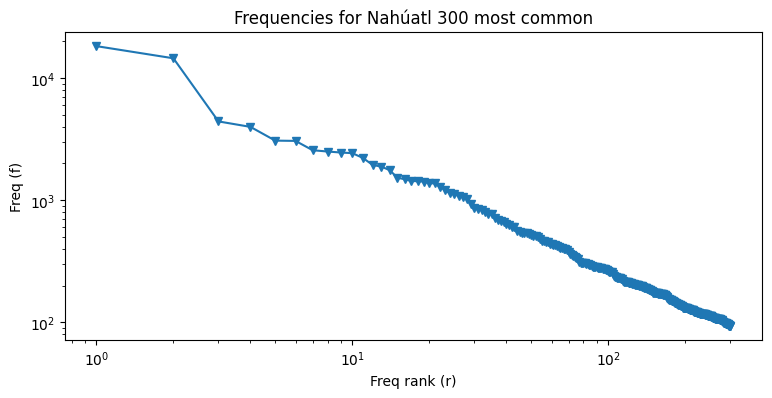

In [57]:
most_common_count = 300
nahuatl_freqs = get_frequencies(nahuatl_vocabulary, most_common_count)
plot_frequencies(nahuatl_freqs, f"Frequencies for Nah√∫atl {most_common_count} most common", log_scale=True)

In [59]:
nahuatl_freqs = get_frequencies(nahuatl_norm_vocabulary, len(nahuatl_norm_vocabulary))
na_freqs = np.array(nahuatl_freqs)
na_ranks = np.array(range(1, len(na_freqs)+1))
alpha_na = calculate_alpha(ranks=na_ranks, frecs=na_freqs)

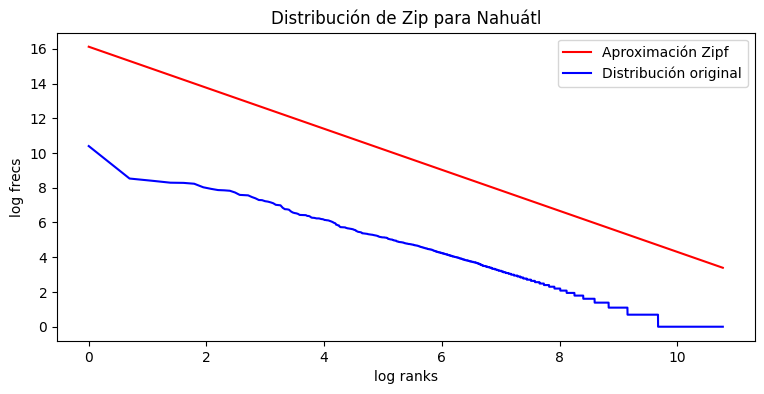

In [60]:
plot_generate_zipf(alpha_na, ranks=na_ranks, freqs=na_freqs)
plt.plot(np.log(na_ranks), np.log(na_freqs), color='b', label='Distribuci√≥n original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.title("Distribuci√≥n de Zip para Nahu√°tl")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

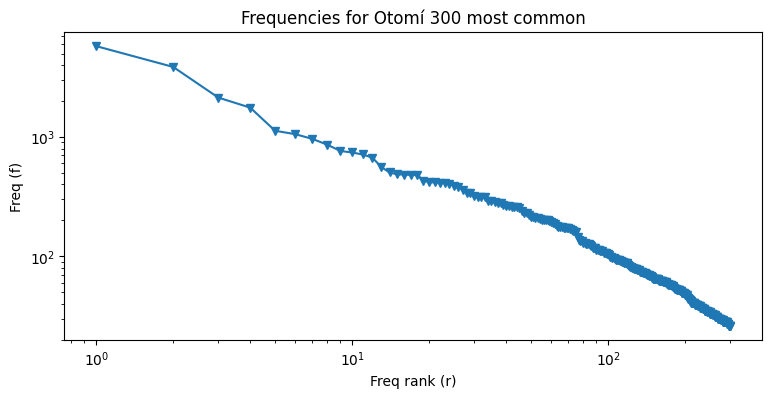

In [61]:
otomi_freqs = get_frequencies(otomi_vocabulary, most_common_count)
plot_frequencies(otomi_freqs, f"Frequencies for Otom√≠ {most_common_count} most common", log_scale=True)

In [62]:
otomi_freqs = get_frequencies(otomi_vocabulary, len(otomi_vocabulary))
oto_freqs = np.array(otomi_freqs)
oto_ranks = np.array(range(1, len(oto_freqs)+1))
alpha_oto = calculate_alpha(ranks=oto_ranks, frecs=oto_freqs)

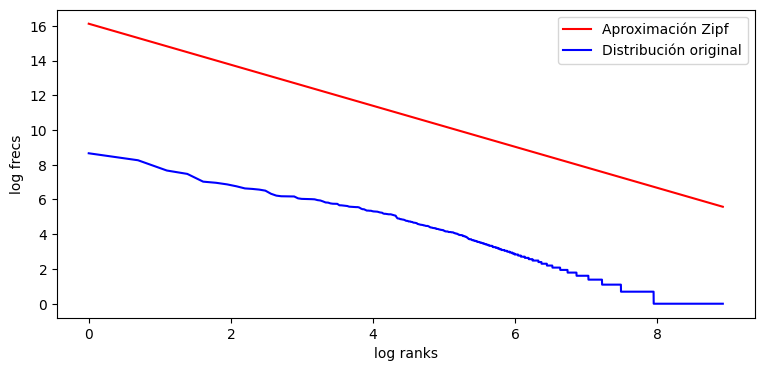

In [63]:
plot_generate_zipf(alpha_oto, ranks=oto_ranks, freqs=oto_freqs)
plt.plot(np.log(oto_ranks), np.log(oto_freqs), color='b', label='Distribuci√≥n original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

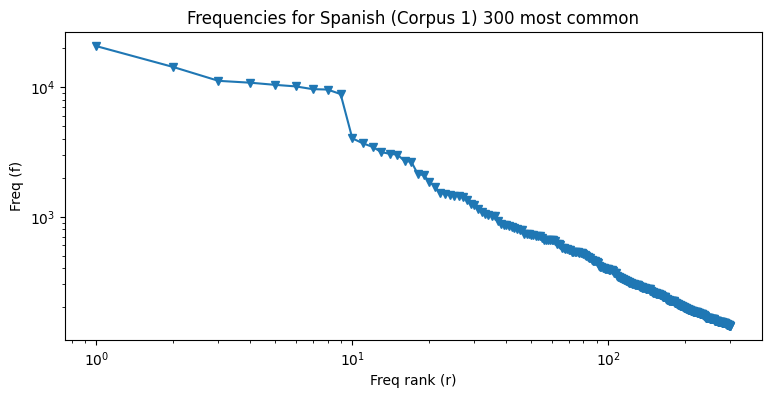

In [64]:
spanish_freqs = get_frequencies(nahuatl_es_vocabulary, most_common_count)
plot_frequencies(spanish_freqs, f"Frequencies for Spanish (Corpus 1) {most_common_count} most common", log_scale=True)

### Pr√°ctica 3: Stop! stop! üöè My Zipf's distribution can talk!!! üôÄ

**Fecha de entrega: Domingo 17 de Marzo 2024 - 11:59pm**


- Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras m√°s com√∫nes obtenidas en Zipf
    - Utilizar el [corpus CREA](https://corpus.rae.es/frec/CREA_total.zip)
    - Realizar una nube de palabras usando las stopwords de paqueteria y las obtenidas atrav√©s de Zipf
    - Responder las siguientes preguntas:
        - ¬øObtenemos el mismo resultado? Si o no y ¬øPorqu√©?
- Comprobar si Zipf se cumple para un lenguaje artificial creado por ustedes
  - Deber√°n darle un nombre a su lenguaje
  - Mostrar una oraci√≥n de ejemplo
  - Pueden ser una secuencia de caracteres aleatorios
  - Tambien pueden definir el tama√±o de las palabras de forma aleatoria